# Linear Optimization**


## Example from Bertsimas and Tsitsiklis (1997)

\begin{align}
\text{minimize} \quad &-x_1-x_2\\
\text{s.t.}\quad & x_1 +2x_2\leq 3\\
& 2x_1+x_2\leq 3\\
& x_1,x_2\geq 0
\end{align}

# **Visual Representation of the set of constraints**

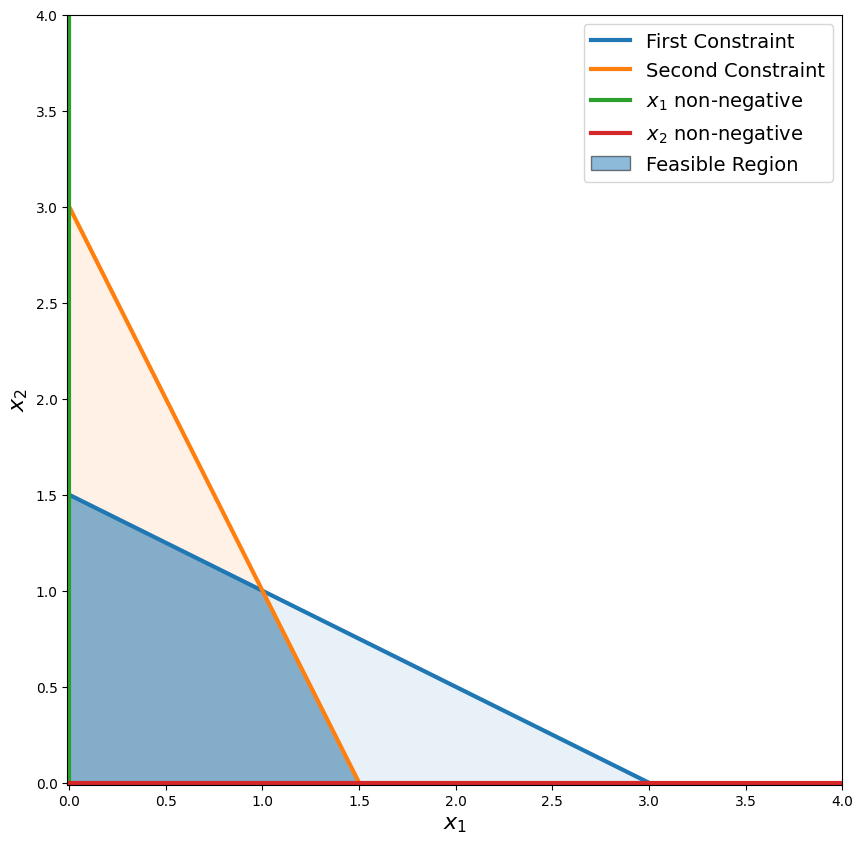

In [ ]:
# create the plot object

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))
x1 = np.linspace(0, 5)

# Add First 0.5*(3-x1)
plt.plot(x1, 0.5*(3-x1), lw=3, label='First Constraint')
plt.fill_between(x1, 0, 0.5*(3-x1), alpha=0.1)

# Add Second Constraint 
plt.plot(x1, 3 - 2 * x1, lw=3, label='Second Constraint')
plt.fill_between(x1, 0, 3 - 2 * x1, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_1$ non-negative')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_2$ non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (1.5,0.),
    (1.0,1.0),
    (0.0,1.5)
])
patch = PathPatch(path, label='Feasible Region', alpha=.5)
ax.add_patch(patch)


### finishing the Graph
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.xlim(-0.01, 4)
plt.ylim(-0.01, 4)
plt.legend(fontsize=14)
plt.show()

# **Iso-Lines**

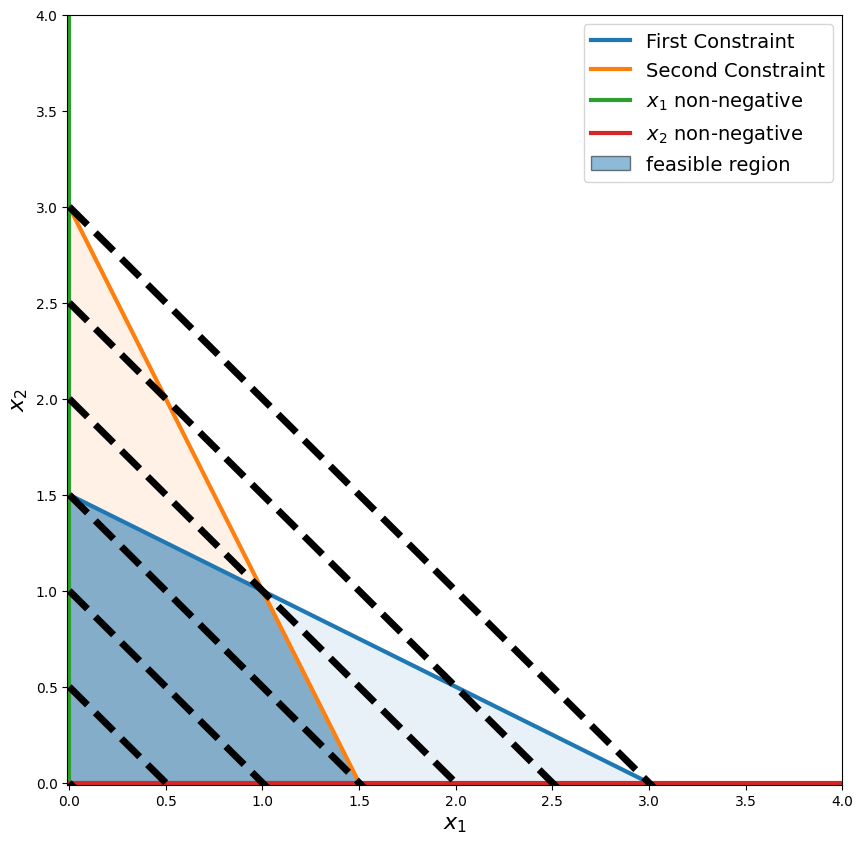

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np
# create the plot object

fig, ax = plt.subplots(figsize=(10, 10))
x1 = np.linspace(0, 5)

# Add First 0.5*(3-x1)
plt.plot(x1, 0.5*(3-x1), lw=3, label='First Constraint')
plt.fill_between(x1, 0, 0.5*(3-x1), alpha=0.1)

# Add Second Constraint 
plt.plot(x1, 3 - 2 * x1, lw=3, label='Second Constraint')
plt.fill_between(x1, 0, 3 - 2 * x1, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_1$ non-negative')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_2$ non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (1.5,0.),
    (1.0,1.0),
    (0.0,1.5)
])
patch = PathPatch(path, label='feasible region', alpha=.5)
ax.add_patch(patch)

# Adding Isco-Profit Curves 
plt.plot(x1, 0.0 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 0.5 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 1.0 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 1.5 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 2 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 2.5 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 3.0 - x1,color='black',lw=5,linestyle='dashed')




### finishing the Graph
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.xlim(-0.01, 4)
plt.ylim(-0.01, 4)
plt.legend(fontsize=14)
plt.show()

# Solving the Linear Program
We are going to use CVXOPT a convex optimization modeling language to solve the linear program below

In [ ]:
#!pip install cvxpy
#!pip install cvxopt
from cvxopt import matrix, solvers
import numpy  
A = matrix([ [1.0, 2.0,-1.0,0.0], [2.0,1.0,0.0,-1.0] ])
b = matrix([ 3.0, 3.0,0.0,0.0 ])
c = matrix([ -1.0, -1.0 ])
sol=solvers.lp(c,A,b)
print(sol['x'])
print(sol['primal objective'])
print(numpy.matmul(numpy.transpose(c),sol['x']))

     pcost       dcost       gap    pres   dres   k/t
 0: -1.8000e+00 -8.4000e+00  3e+00  0e+00  2e+00  1e+00
 1: -1.8855e+00 -2.2414e+00  1e-01  1e-16  1e-01  3e-02
 2: -1.9989e+00 -2.0034e+00  2e-03  3e-16  1e-03  4e-04
 3: -2.0000e+00 -2.0000e+00  2e-05  3e-16  1e-05  4e-06
 4: -2.0000e+00 -2.0000e+00  2e-07  2e-16  1e-07  4e-08
 5: -2.0000e+00 -2.0000e+00  2e-09  1e-16  1e-09  4e-10
Optimal solution found.
[ 1.00e+00]
[ 1.00e+00]

-1.999999998938374
[[-2.]]


# **"Sensitivity Analysis"**
What is the solution if the problem goes from :

\begin{align}
\text{minimize} \quad &-x_1-x_2\\
\text{s.t.}\quad & x_1 +2x_2\leq 3\\
& 2x_1+x_2\leq 3\\
& x_1,x_2\geq 0
\end{align}


to

\begin{align}
\text{minimize} \quad &-1.5x_1-x_2\\
\text{s.t.}\quad & x_1 +2x_2\leq 3\\
& 2x_1+x_2\leq 3\\
& x_1,x_2\geq 0
\end{align}

Complete the code below

In [ ]:
from cvxopt import matrix, solvers
import numpy  

In [ ]:
A = matrix([ [1.0, 2.0,-1.0,0.0], [2.0,1.0,0.0,-1.0] ])
b = matrix([ 3.0, 3.0,0.0,0.0 ])
c = matrix([ -1.5, -1.0 ])
sol=solvers.lp(c,A,b)
print(sol['x'])
print(sol['primal objective'])
print(numpy.matmul(numpy.transpose(c),sol['x']))

     pcost       dcost       gap    pres   dres   k/t
 0: -2.2500e+00 -9.7500e+00  3e+00  0e+00  2e+00  1e+00
 1: -2.3819e+00 -2.8895e+00  2e-01  2e-16  1e-01  4e-02
 2: -2.4934e+00 -2.5141e+00  8e-03  5e-16  5e-03  1e-03
 3: -2.4999e+00 -2.5001e+00  8e-05  2e-16  5e-05  1e-05
 4: -2.5000e+00 -2.5000e+00  8e-07  1e-16  5e-07  1e-07
 5: -2.5000e+00 -2.5000e+00  8e-09  1e-16  5e-09  1e-09
Optimal solution found.
[ 1.00e+00]
[ 1.00e+00]

-2.499999993404471
[[-2.49999999]]


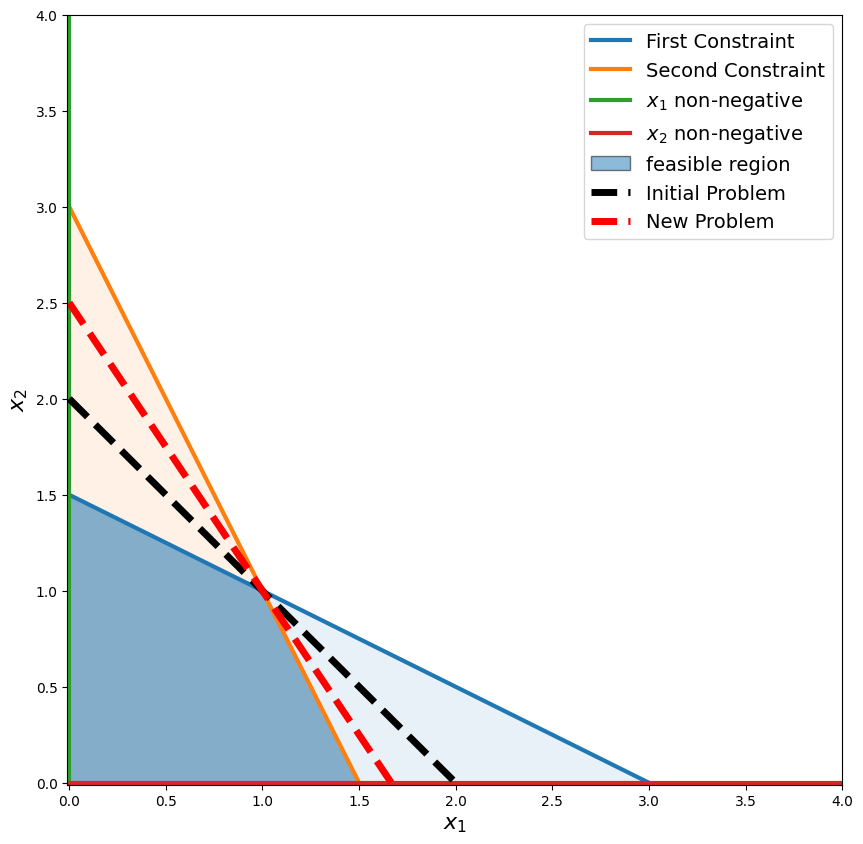

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np
# create the plot object

fig, ax = plt.subplots(figsize=(10, 10))
x1 = np.linspace(0, 5)

# Add First 0.5*(3-x1)
plt.plot(x1, 0.5*(3-x1), lw=3, label='First Constraint')
plt.fill_between(x1, 0, 0.5*(3-x1), alpha=0.1)

# Add Second Constraint 
plt.plot(x1, 3 - 2 * x1, lw=3, label='Second Constraint')
plt.fill_between(x1, 0, 3 - 2 * x1, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_1$ non-negative')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_2$ non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (1.5,0.),
    (1.0,1.0),
    (0.0,1.5)
])
patch = PathPatch(path, label='feasible region', alpha=.5)
ax.add_patch(patch)

# Adding Isco-Profit Curves 
plt.plot(x1, 2.0 - x1,color='black',lw=5,linestyle='dashed',label='Initial Problem')
plt.plot(x1, 2.5 -1.5*x1,color='red',lw=5,linestyle='dashed',label='New Problem')


### finishing the Graph
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.xlim(-0.01, 4)
plt.ylim(-0.01, 4)
plt.legend(fontsize=14)
plt.show()

The (1,1) solution is pretty robust cause as the parameter changes, the result is not going to be changed.

# **Lego**
You are the manager of a Lego Furniture production facility. The current resources available in your
factory are 6 large orange Lego blocks and 8 small green Lego blocks.
You can make two kinds of furniture with your available Lego blocks. The first kind is a chair, which
retails for 10 dollars and takes 2 green blocks and 1 orange block to manufacture. The second one is a table,
which retails for 16 dollars and takes 2 green blocks and 2 orange blocks to manufacture. Both pieces are
good sellers and you’ll be able to sell anything you produce.
What should you build in order to maximize revenues?

What should you build in order to maximize revenues?

# **Modeling**
What are the decision variables? 

What is the objective function?

What are the constraints?


#**Graph**

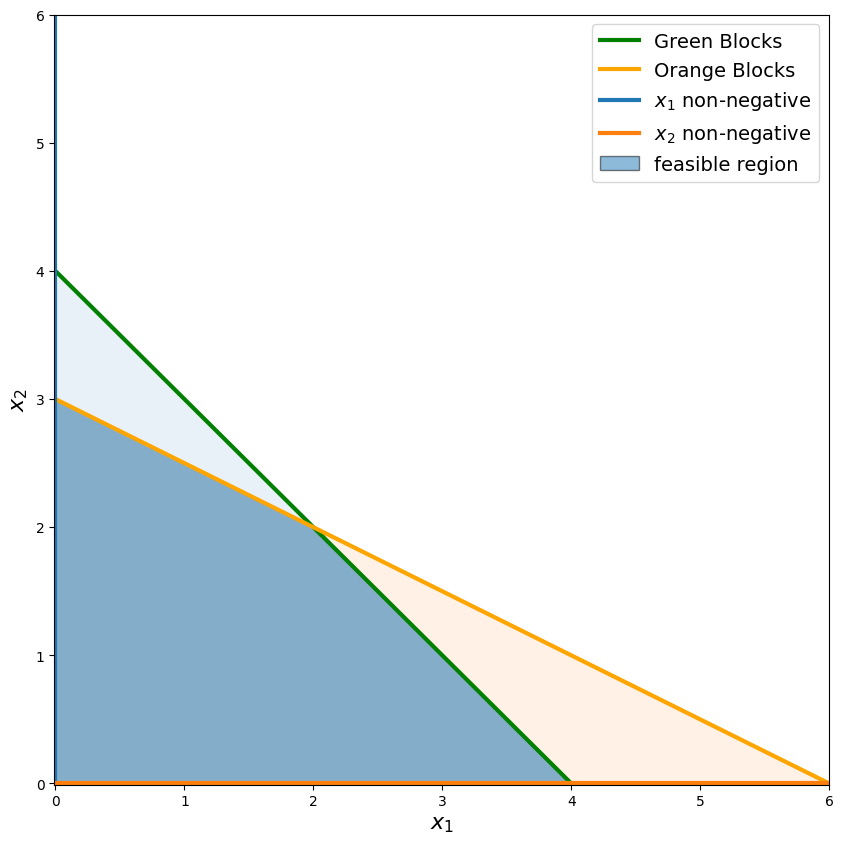

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np
# create the plot object

fig, ax = plt.subplots(figsize=(10, 10))
x1 = np.linspace(0, 10)

# Add First 0.5*(3-x1)
plt.plot(x1, 0.5*(8-2*x1), lw=3, color="green",label='Green Blocks')
plt.fill_between(x1, 0, 0.5*(8-2*x1), alpha=0.1)

# Add Second Constraint 
plt.plot(x1, 0.5*(6 -  x1), lw=3,color="orange", label='Orange Blocks')
plt.fill_between(x1, 0,  0.5*(6 -  x1), alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_1$ non-negative')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_2$ non-negative')

#highlight the feasible region
path = Path([
    (0., 0.),
    (4.0,0.),
    (2.0,2.0),
    (0.0,3.0)
])
patch = PathPatch(path, label='feasible region', alpha=.5)
ax.add_patch(patch)


### finishing the Graph
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.xlim(-0.01, 6)
plt.ylim(-0.01, 6)
plt.legend(fontsize=14)
plt.show()

# **Model in Compact Form**

We can rewrite this linear program in compact form

\begin{align}
\text{Maximize} \quad c^T x\\
\text{s.t.}\quad & Ax\leq b\\
\end{align}



# **Solution**

In [ ]:
from cvxopt import matrix, solvers
import numpy  

In [ ]:
A = matrix([ [2.0, 1.0,-1.0,0.0], [2.0,2.0,0.0,-1.0] ])
b = matrix([ 8.0, 6.0,0.0,0.0 ])
c = matrix([ -10.0, -16.0 ])  # if this is not changed, then it means minimizing the profit by producing nothing
sol=solvers.lp(c,A,b)
print(sol['x'])
print(-sol['primal objective'])
print(-numpy.matmul(numpy.transpose(c),sol['x']))

print(sol['z'])
# green blocks
# orange blocks

     pcost       dcost       gap    pres   dres   k/t
 0: -4.8667e+01 -9.0667e+01  1e+01  0e+00  6e-01  1e+00
 1: -5.1336e+01 -5.4697e+01  1e+00  3e-16  5e-02  8e-02
 2: -5.1992e+01 -5.2054e+01  2e-02  4e-16  9e-04  2e-03
 3: -5.2000e+01 -5.2001e+01  2e-04  3e-16  9e-06  2e-05
 4: -5.2000e+01 -5.2000e+01  2e-06  2e-16  9e-08  2e-07
Optimal solution found.
[ 2.00e+00]
[ 2.00e+00]

51.99999922485854
[[51.99999922]]
[ 2.00e+00]
[ 6.00e+00]
[ 2.37e-07]
[ 2.31e-07]



In [ ]:
# if having 11 green blocks instead
A = matrix([ [2.0, 1.0,-1.0,0.0], [2.0,2.0,0.0,-1.0] ])
b = matrix([ 8.0, 6.0,0.0,0.0 ])
c = matrix([ -10.0, -16.0 ])  # if this is not changed, then it means minimizing the profit by producing nothing
sol=solvers.lp(c,A,b)
print(sol['x'])
print(-sol['primal objective'])
print(-numpy.matmul(numpy.transpose(c),sol['x']))

     pcost       dcost       gap    pres   dres   k/t
 0: -4.8667e+01 -9.0667e+01  1e+01  0e+00  6e-01  1e+00
 1: -5.1336e+01 -5.4697e+01  1e+00  3e-16  5e-02  8e-02
 2: -5.1992e+01 -5.2054e+01  2e-02  4e-16  9e-04  2e-03
 3: -5.2000e+01 -5.2001e+01  2e-04  3e-16  9e-06  2e-05
 4: -5.2000e+01 -5.2000e+01  2e-06  2e-16  9e-08  2e-07
Optimal solution found.
[ 2.00e+00]
[ 2.00e+00]

51.99999922485854
[[51.99999922]]


In [ ]:
import cvxopt
from cvxopt import glpk
c = cvxopt.matrix([-10.0,-16.0],tc='d')
b=cvxopt.matrix([11.0,6.0,0.0,0.0],tc='d')
A=cvxopt.matrix([[2.0,1.0,-1.0,0.0],[2.0,2.0,0.0,-1.0]])
(status,x)=cvxopt.glpk.ilp(c,A,b,I=set([0,1]))  
print(status)
print(x[0],x[1])
print(x)  
print(-sum(c.T*x))

optimal
4.0 1.0
[ 4.00e+00]
[ 1.00e+00]

56.0


# **Duality and Shadow Price**


Remember that if the Primal is

\begin{align}
\text{Maximize} &\quad c^T x\\
\text{s.t.}\quad & Ax\leq b\\
&x\geq 0
\end{align}

The Dual is 

\begin{align}
\text{Maximize} &\quad y^T b\\
\text{s.t.}\quad & A^Ty\geq c\\
&y\geq 0
\end{align}


where $y$ are the shadow prices for the constraints $Ax\leq b$.


In [ ]:
from cvxopt import matrix, solvers
import numpy  
AT = matrix([ [2.0, 2.0,-1.0,0.0], [1.0,2.0,0.0,-1.0] ])
bd = matrix([ 8.0, 6.0])
c = matrix([ 10.0, 16.0,0.0,0.0 ])
sol=solvers.lp(bd,-AT,c) # code for the dual
print(-sol['x'])
print(-sol['primal objective'])